# <span style="color:#0b486b">SIT307 - Data Mining and Machine Learning</span>


## <span style="color:#0b486b">Data Analysis Project</span>

##      Rain in Autralia 
### Group 10 | Data Mining | 23/08/2019
***

Load libraries

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load dataset

In [64]:
#get data from csv file
df = pd.read_csv('weatherAUS.csv')
#look at the data size
print(f'Size of the dataset : {df.shape}')
#have a look first 5 data in dataset
df.head()

Size of the dataset : (142193, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Data Descriptions

In [65]:
#look at all features detail
df.describe(include = 'all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,2016-09-25,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,NaN,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN


In [66]:
#look at the data type for each feature
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

Summary of missing values

In [67]:
#look at the missing values count
df.isna().sum().sort_values()

Date                 0
RISK_MM              0
RainTomorrow         0
Location             0
MaxTemp            322
MinTemp            637
Temp9am            904
WindSpeed9am      1348
Rainfall          1406
RainToday         1406
Humidity9am       1774
WindSpeed3pm      2630
Temp3pm           2726
Humidity3pm       3610
WindDir3pm        3778
WindGustSpeed     9270
WindGustDir       9330
WindDir9am       10013
Pressure3pm      13981
Pressure9am      14014
Cloud9am         53657
Cloud3pm         57094
Evaporation      60843
Sunshine         67816
dtype: int64

Percentages of missing values

In [68]:
#look at the percentages for each features
df.isna().mean().sort_values().round(4)*100

Date              0.00
RISK_MM           0.00
RainTomorrow      0.00
Location          0.00
MaxTemp           0.23
MinTemp           0.45
Temp9am           0.64
WindSpeed9am      0.95
Rainfall          0.99
RainToday         0.99
Humidity9am       1.25
WindSpeed3pm      1.85
Temp3pm           1.92
Humidity3pm       2.54
WindDir3pm        2.66
WindGustSpeed     6.52
WindGustDir       6.56
WindDir9am        7.04
Pressure3pm       9.83
Pressure9am       9.86
Cloud9am         37.74
Cloud3pm         40.15
Evaporation      42.79
Sunshine         47.69
dtype: float64

Create new column named 'Datetime' that provide the converted datetime format from 'Date' <br />
Calculate and analysis the continous of datetime when collecting data for each Location.

In [69]:
import itertools
#get new datatime feature which is data but in year/month/date format
df['Datetime'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d')
#check each location
for name, location_group in df.groupby('Location', sort=False):
    location_values = location_group['Datetime'].sort_values()
    prev_value = next(iter(location_values))
    #prev data less next value check the date Continuity of data
    for index, value in itertools.islice(location_values.iteritems(), 1, len(location_values)):
        df.at[index, 'TimeDelta'] = value - prev_value
        prev_value = value

df.groupby('Location')['TimeDelta'].describe().sort_values('max',ascending = True)


,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Katherine,1558,1 days 00:15:42.747111,0 days 03:01:47.425394,1 days,1 days,1 days,1 days,4 days
Nhil,1568,1 days 00:08:15.918367,0 days 03:47:01.462237,1 days,1 days,1 days,1 days,7 days
Uluru,1520,1 days 00:53:03.157894,0 days 17:15:48.217835,1 days,1 days,1 days,1 days,28 days
Adelaide,3089,1 days 01:29:02.311427,0 days 22:52:57.954317,1 days,1 days,1 days,1 days,32 days
NorahHead,2928,1 days 01:23:06.885245,1 days 00:22:30.904043,1 days,1 days,1 days,1 days,32 days
NorfolkIsland,2963,1 days 01:05:07.391157,0 days 23:22:03.071532,1 days,1 days,1 days,1 days,32 days
Nuriootpa,3001,1 days 00:45:35.088303,0 days 22:32:52.982687,1 days,1 days,1 days,1 days,32 days
PearceRAAF,2761,1 days 02:55:14.451285,1 days 03:04:37.662088,1 days,1 days,1 days,1 days,32 days
Penrith,2963,1 days 01:20:11.339858,0 days 23:20:01.226195,1 days,1 days,1 days,1 days,32 days


In [70]:
#after analysis drop all feature related to time
df = df.drop(columns=['Datetime', 'TimeDelta','Date'])

#### Location to State

Create new column named 'State' that provide information about which state the location belong to:

In [71]:
#create lists used for sort the location by state
NSW = ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree','Newcastle','NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney','SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong' ]
ACT = ['Canberra', 'Tuggeranong','MountGinini']
VIC = ['Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia','Dartmoor']
QLD = ['Brisbane', 'Cairns', 'GoldCoast', 'Townsville']
SA = ['Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera']
WA = ['Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'Walpole', 'SalmonGums']
TAS = ['Hobart', 'Launceston']
NT= ['AliceSprings', 'Darwin', 'Katherine','Uluru']

In [72]:
#sort the location into states
def getStates(stationName):
    for station in NSW:
        if(stationName == station):
            return 'NSW'
    for station in ACT:
        if(stationName == station):
            return 'ACT'
    for station in VIC:
        if(stationName == station):
            return 'VIC'
    for station in QLD:
        if(stationName == station):
            return 'QLD'
    for station in SA:
        if(stationName == station):
            return 'SA'
    for station in WA:
        if(stationName == station):
            return 'WA'
    for station in TAS:
        if(stationName == station):
            return 'TAS'
    for station in NT:
        if(stationName == station):
            return 'NT'

In [73]:
#create new feature called state
statelist = []
for index, location in enumerate(df.Location):
    statelist.append(getStates(location))
df.insert(1,'State',statelist,True)

In [74]:
df.head()

,Location,State,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,Albury,NSW,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,Albury,NSW,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,Albury,NSW,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,Albury,NSW,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,Albury,NSW,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Data Cleansing

Drop the columns that have more than 10% elements are missing

In [75]:
#drop the features that has more than 10% missing values
df = df.dropna(thresh=len(df)*0.9, axis='columns')[:]
df.isna().mean().round(4)*100

Location         0.00
State            0.00
MinTemp          0.45
MaxTemp          0.23
Rainfall         0.99
WindGustDir      6.56
WindGustSpeed    6.52
WindDir9am       7.04
WindDir3pm       2.66
WindSpeed9am     0.95
WindSpeed3pm     1.85
Humidity9am      1.25
Humidity3pm      2.54
Pressure9am      9.86
Pressure3pm      9.83
Temp9am          0.64
Temp3pm          1.92
RainToday        0.99
RISK_MM          0.00
RainTomorrow     0.00
dtype: float64

Filling missing data by the mean of its location value for each feature that have around 1000 missing elements.

Group of columns need to fillna values

In [76]:
#the features that will fillna with mean
replaceCols = ['MaxTemp', 'MinTemp','WindSpeed9am','WindSpeed3pm','Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']

Fillna in each column with the mean of its grouped location

In [77]:
#fill the na data using meaning of location
for col in replaceCols:
    df[col] = df.groupby('Location')[col].transform(lambda x: x.fillna(x.mean()))

Dataset after filling missing values

In [78]:
#check the missing value count
df.isna().sum().sort_values()

Location             0
Temp3pm              0
Temp9am              0
Humidity3pm          0
Humidity9am          0
WindSpeed3pm         0
RISK_MM              0
WindSpeed9am         0
MaxTemp              0
MinTemp              0
State                0
RainTomorrow         0
Rainfall          1406
RainToday         1406
WindDir3pm        3778
WindGustSpeed     9270
WindGustDir       9330
WindDir9am       10013
Pressure3pm      13981
Pressure9am      14014
dtype: int64

Drop the rows that contains missing elements

In [79]:
#drop the rows contains missing elements
df = df.dropna()

Drop columns 'RISK_MM' <br />
This column is recommended to be dropped since it is highly affected to conclusion in RainTomorrow column

In [80]:
#drop the columns risk-mm
df = df.drop(columns=['RISK_MM'])

In [81]:
#check the missing value count after all steps of data cleansing
df.isna().sum().sort_values()

Location         0
Temp3pm          0
Temp9am          0
Pressure3pm      0
Pressure9am      0
Humidity3pm      0
Humidity9am      0
WindSpeed3pm     0
RainToday        0
WindSpeed9am     0
WindDir9am       0
WindGustSpeed    0
WindGustDir      0
Rainfall         0
MaxTemp          0
MinTemp          0
State            0
WindDir3pm       0
RainTomorrow     0
dtype: int64

In [82]:
#drop the column location after state created
df = df.drop(columns = ['Location'])

#### Create the DataFrame Profile Report

Data profile report provide general views of data feature and relationship for further experiment and analysis

#checking the data using powerful library pandas-profiling 
pandas_profiling.ProfileReport(df)

## Data Experiments and Analysis

### Hypothesis Test

**Testing the means in collected data of every State in Australia are significant similar or not?**

Group the data by 'State' and calculate the mean for each feature

In [83]:
df.groupby('State', sort = False).mean()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
State,,,,,,,,,,,,
NSW,13.498093,23.759757,2.812584,40.324251,15.084182,19.315050,67.917786,52.520519,1018.095396,1015.604556,17.993390,22.280871
ACT,7.541442,21.041260,2.080047,39.051605,10.686823,17.615324,71.459096,46.365799,1018.123872,1015.454816,13.148683,19.573823
VIC,9.572854,20.795172,1.715599,42.346743,16.075839,20.220242,74.188813,52.733213,1017.781283,1015.962180,13.794056,19.287316
QLD,18.839667,27.777808,3.950073,36.924860,14.539888,20.734135,65.741049,58.733755,1016.418574,1013.386535,23.906291,26.039004
SA,11.169193,22.894912,1.406030,41.577252,16.046571,19.473017,63.241908,43.667570,1018.346157,1016.278898,16.008639,21.442581
WA,12.345042,24.090755,2.194101,40.996068,15.121977,18.770218,64.472963,50.225312,1017.669847,1015.505409,18.074785,22.402404
TAS,8.935457,18.438872,1.852604,44.434137,14.383125,18.850194,69.370885,53.844700,1014.564335,1012.920254,12.619440,16.861386
NT,18.321761,31.666530,2.718044,40.594148,15.413479,18.649932,53.954864,36.923886,1014.338206,1010.533891,24.402832,30.309266


In [84]:
numeric_cols = df.select_dtypes(include='number').columns

In [85]:
from scipy import stats

def AnovaHypothesesTest(x):
    
    df_anova = df[[x,'State']]
    grps = pd.unique(df_anova.State.values)
    d_data = {grp:df_anova[x][df_anova.State == grp] for grp in grps}

    F, p = stats.f_oneway(d_data['NSW'], d_data['ACT'], d_data['VIC'], d_data['QLD'], d_data['SA'], d_data['WA'], d_data['TAS'], d_data['NT'] )
    
    print(f"H0: All the means of {x} of every State in Australia are the same.")
    print(f"HA: Not all the means of {x} of every State in Australia are the same.")
    print()
    print("p-value for significance is: ", p.round(3))
    
    print('Conclusion:')
    if p < 0.05:
        print("reject null hypothesis (H0)")
    else:
        print("accept null hypothesis (H0)")

In [86]:
for col in numeric_cols:
    AnovaHypothesesTest(col)
    print('----------------------------------------------------------------------------')

H0: All the means of MinTemp of every State in Australia are the same.
HA: Not all the means of MinTemp of every State in Australia are the same.

p-value for significance is:  0.0
Conclusion:
reject null hypothesis (H0)
----------------------------------------------------------------------------
H0: All the means of MaxTemp of every State in Australia are the same.
HA: Not all the means of MaxTemp of every State in Australia are the same.

p-value for significance is:  0.0
Conclusion:
reject null hypothesis (H0)
----------------------------------------------------------------------------
H0: All the means of Rainfall of every State in Australia are the same.
HA: Not all the means of Rainfall of every State in Australia are the same.

p-value for significance is:  0.0
Conclusion:
reject null hypothesis (H0)
----------------------------------------------------------------------------
H0: All the means of WindGustSpeed of every State in Australia are the same.
HA: Not all the means of Wi

### Z-Score

Z-score is used to detect the outliers in the dataset

In [87]:
zscore_df = df[numeric_cols].copy()

Calculate Z-score for each column

In [88]:
#calculate z score
from scipy.stats import zscore
zscore_df = zscore_df.apply(zscore)

Count number of outliers in each column which are elements have Z-score greater than 3 or less than -3 <br />

In [89]:
#check all outliers counts
for col in zscore_df.columns:
    outlier = zscore_df.loc[abs(zscore_df[col]) > 3, [col]]
    print(f"There are {len(outlier)} outliers in columns {col}.")
    print()

There are 12 outliers in columns MinTemp.

There are 50 outliers in columns MaxTemp.

There are 1944 outliers in columns Rainfall.

There are 1191 outliers in columns WindGustSpeed.

There are 1140 outliers in columns WindSpeed9am.

There are 816 outliers in columns WindSpeed3pm.

There are 337 outliers in columns Humidity9am.

There are 0 outliers in columns Humidity3pm.

There are 486 outliers in columns Pressure9am.

There are 410 outliers in columns Pressure3pm.

There are 31 outliers in columns Temp9am.

There are 73 outliers in columns Temp3pm.



### Features affect to RainTomorrow

In [90]:
def ResultAffect(col, data):
    af = pd.DataFrame(data[[col, 'RainTomorrow']].groupby([col, 'RainTomorrow']).size().unstack())
    af.plot.bar(rot=45)

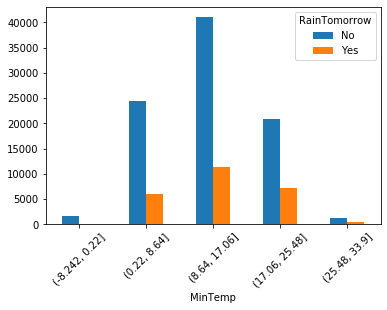

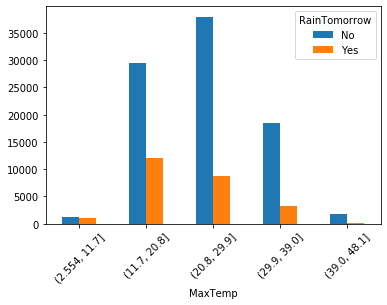

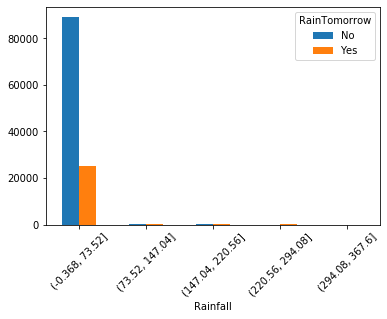

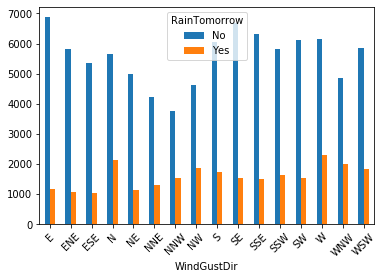

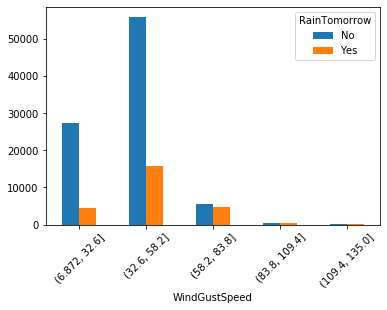

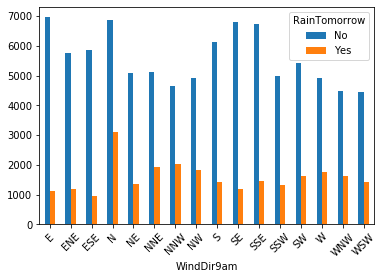

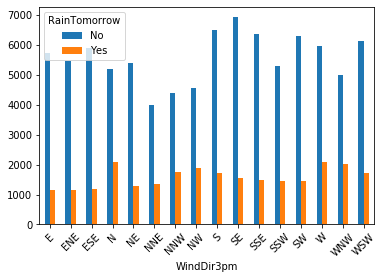

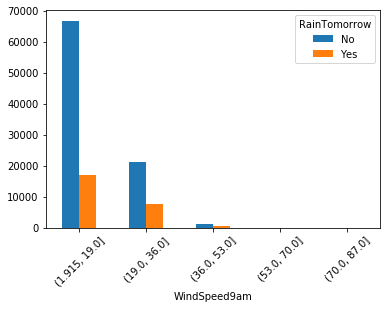

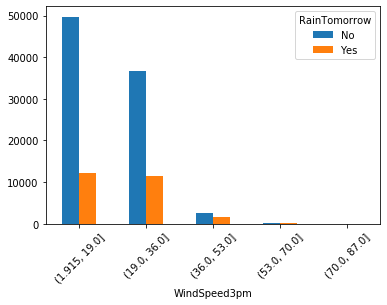

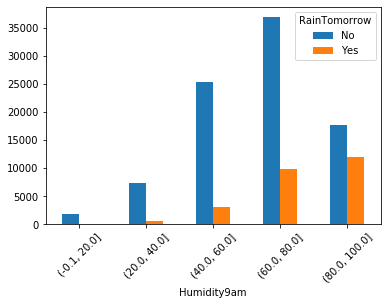

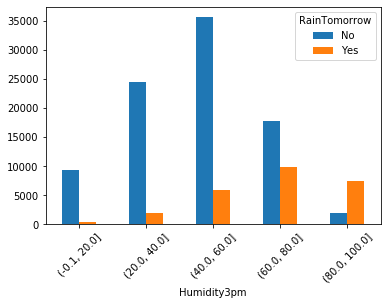

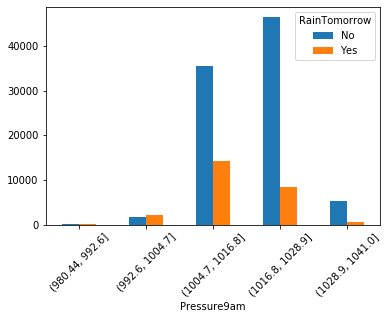

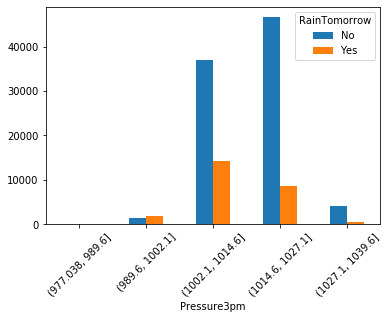

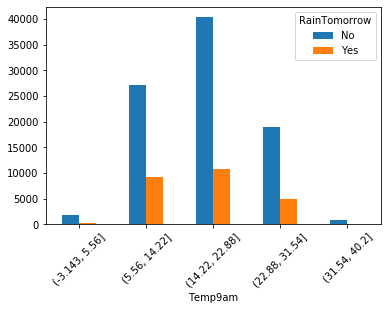

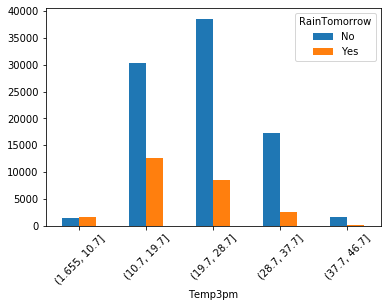

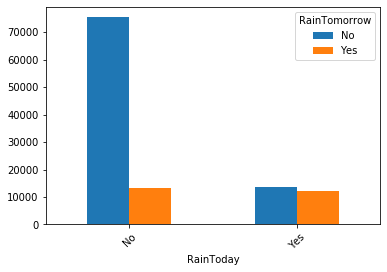

In [91]:
df_affect = df.copy()
affect_cols = ['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']

cut_cols = df_affect.select_dtypes(include='number').columns

for col in cut_cols:
    df_affect[col] = pd.cut(df_affect[col], 5)
    
for col in affect_cols:
    ResultAffect(col, df_affect)

### Features Relationship

Select the numeric attributes for DataFrame<br />
These features are used to analysis.

In [92]:
#get the numeric attributes
numeric_cols = df.select_dtypes(include='number').columns

Calculate and visualise the correlation for each pair of feature. <br />

In [93]:
#Calculate the corrlation
df_coef = df.corr()
df_coef.style.background_gradient(cmap='coolwarm').set_precision(2)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.00,0.73,0.10,0.16,0.15,0.14,-0.22,0.02,-0.44,-0.45,0.90,0.71
MaxTemp,0.73,1.00,-0.08,0.05,-0.01,0.01,-0.51,-0.50,-0.32,-0.42,0.89,0.98
Rainfall,0.10,-0.08,1.00,0.13,0.08,0.06,0.24,0.26,-0.17,-0.13,0.01,-0.08
WindGustSpeed,0.16,0.05,0.13,1.00,0.59,0.68,-0.18,-0.02,-0.44,-0.40,0.12,0.02
WindSpeed9am,0.15,-0.01,0.08,0.59,1.00,0.50,-0.22,-0.02,-0.20,-0.15,0.09,-0.02
WindSpeed3pm,0.14,0.01,0.06,0.68,0.50,1.00,-0.09,0.05,-0.28,-0.24,0.12,-0.02
Humidity9am,-0.22,-0.51,0.24,-0.18,-0.22,-0.09,1.00,0.68,0.11,0.17,-0.46,-0.51
Humidity3pm,0.02,-0.50,0.26,-0.02,-0.02,0.05,0.68,1.00,-0.03,0.05,-0.21,-0.55
Pressure9am,-0.44,-0.32,-0.17,-0.44,-0.20,-0.28,0.11,-0.03,1.00,0.96,-0.40,-0.27
Pressure3pm,-0.45,-0.42,-0.13,-0.40,-0.15,-0.24,0.17,0.05,0.96,1.00,-0.46,-0.38


### Data visualization

Visualize features's relationship

#visualize the regression
feature = df[df_coef.columns]
sns.pairplot(feature)
sns.set_context("paper", font_scale=1.6)

Function to scatch boxplots

#the function to see the botplot
def boxplot(column):
    fig, ax = plt.subplots(figsize = (15, 12))
    sns.boxplot(df.State, df[column], data = df, ax = ax)
    plt.xlabel('State',fontsize=18)
    plt.ylabel(column,fontsize=18)
    
    for t in ax.get_xticklabels():
        t.set_fontsize(12)
        
    for t in ax.get_yticklabels():
        t.set_fontsize(12)

Scatch boxplot for all numeric features in DataFrame

#display the botplots
for col in numeric_cols:
    boxplot(col)

### Convert categorical into numeric datatype

'RainToday' and 'RandTomorrow' columns <br />
1 is yes; 0 is no.

In [94]:
#replace yes with 1 no with 0

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow']= le.fit_transform(df['RainTomorrow'])
df.head()

,State,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,NSW,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,NSW,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,NSW,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,NSW,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,NSW,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


### Create Dummies for categorical data

In [95]:
#get dummy of the three wind direction feature
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
df = pd.get_dummies(df, columns=categorical_columns)

### Normalize numeric data

In [96]:
# get the columns from df_coef to normalize
nor_cols = df_coef.columns

In [97]:
#normaliz the data and display the detail
from sklearn import preprocessing
df[nor_cols] = df[nor_cols].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
df[nor_cols] = min_max_scaler.fit_transform(df[nor_cols])
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
count,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000,...,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000,114547.000000
mean,0.496561,0.464157,0.006498,0.263841,0.154771,0.205541,0.673947,0.506373,0.609891,0.606576,...,0.058282,0.058937,0.066086,0.069805,0.071429,0.055209,0.061433,0.058421,0.053332,0.051525
std,0.149129,0.154495,0.023474,0.103948,0.097986,0.100742,0.188612,0.206813,0.116190,0.111417,...,0.234276,0.235507,0.248434,0.254820,0.257542,0.228388,0.240124,0.234540,0.224695,0.221066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387173,0.345055,0.000000,0.187500,0.082353,0.129412,0.560000,0.360000,0.533884,0.531200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.489311,0.452747,0.000000,0.250000,0.129412,0.200000,0.680000,0.510000,0.609917,0.606400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.605701,0.575824,0.002176,0.320312,0.211765,0.258824,0.810000,0.650000,0.687603,0.681600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
#checkout the final dataset
df.head()

,State,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,NSW,0.513064,0.446154,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,...,0,0,0,0,0,0,0,1,0,0
1,NSW,0.370546,0.494505,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,...,1,0,0,0,0,0,0,0,0,0
2,NSW,0.501188,0.507692,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,...,0,0,0,0,0,0,0,1,0,0
3,NSW,0.413302,0.558242,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,...,0,0,0,1,0,0,0,0,0,0
4,NSW,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df.to_csv("Result.csv", index=False)